# T-distributed Stochastic Neighbor Embedding (t-SNE)

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import string
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.fasttext import FastText as ft
from numpy import genfromtxt

unable to import 'smart_open.gcs', disabling that module


## Stop words and defining all functions

In [2]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
             "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
             "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
             "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
             "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
             "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
             "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
             "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
             "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
             "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


def load_embeddings(words):
    en_model = ft.load_fasttext_format('wiki.en.bin')
    embedding = np.array([])
    for word in words:
        embedding = np.append(embedding, en_model[word[0]])
    return embedding


def top_words(lines, num_words, n_grams):
    all_tokens = []
    for line in lines:
        tokens = tokenize(line, n_grams)
        for t in tokens:
            if t not in stopwords:
                all_tokens.append(t)
    counter = Counter(all_tokens)
    return counter.most_common(num_words)


def read_file(file_path):
    with open(file_path) as file:
        return [line.rstrip() for line in file]


def extract_reviews(lines):
    r = []
    for line in lines:
        split = line.strip().split(' ')
        if len(split) > 3:
            r.append(split[3])
    return r


def tokenize(text, n_grams):
    """
    remove punctuation and non-alpha characters, return all tokens after lower case-ing and splitting by space
    :param n_grams: length of n-gram
    :param text:
    :return:
    """
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [token for token in tokens if token not in stopwords]
    return [' '.join(x) for x in ngrams(tokens, n_grams)]


def ngrams(tokens, n):
    output = []
    for i in range(len(tokens) - n + 1):
        output.append(tokens[i:i + n])
    return output


def plot_with_labels(low_dim_embs, labels, filename='tsne-side_effects.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(22, 22))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)



## Getting reviews 

In [3]:
df = pd.read_csv('full_merge.csv')
df.Reviews = df.Reviews.astype(str)

In [4]:
reviews = df.Reviews.values

## Cleaning reviews and getting top words 

In [5]:
top_words = top_words(reviews, 100, 2)

In [6]:
print(top_words)

[('side effects', 76791), ('birth control', 24282), ('weight gain', 16119), ('side effect', 14133), ('started taking', 13945), ('mood swings', 13615), ('feel like', 12100), ('blood pressure', 11845), ('sex drive', 10297), ('years ago', 8234), ('felt like', 7822), ('much better', 7414), ('taking medication', 7127), ('two weeks', 7072), ('first time', 7013), ('every day', 6452), ('panic attacks', 6422), ('stopped taking', 6406), ('back pain', 6083), ('months ago', 6049), ('years old', 6036), ('would recommend', 5467), ('stop taking', 5336), ('went away', 5029), ('year old', 4904), ('taking pill', 4860), ('go away', 4728), ('per day', 4667), ('twice day', 4632), ('next day', 4623), ('dry mouth', 4613), ('works well', 4574), ('taking drug', 4531), ('first month', 4454), ('first week', 4437), ('times day', 4332), ('worked well', 4330), ('two months', 4317), ('works great', 4138), ('go back', 3979), ('doctor prescribed', 3977), ('really bad', 3975), ('side affects', 3971), ('two days', 3873)

In [7]:
with open('top_words_n-grams.txt', mode='w', encoding='utf-8') as myfile:
    myfile.write('\n'.join([w[0] for w in top_words]))



## Fasttext wikipedia embeddings 

In [8]:
embeddings = load_embeddings(top_words)
np.savetxt('bigram-embeddings', embeddings, delimiter=',')


/Users/akash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  
/Users/akash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [9]:
top_words = []
with open('top_words_n-grams.txt', mode='r', encoding='utf-8') as myfile:
    top_words = myfile.readlines()

In [10]:
print(top_words)

['side effects\n', 'birth control\n', 'weight gain\n', 'side effect\n', 'started taking\n', 'mood swings\n', 'feel like\n', 'blood pressure\n', 'sex drive\n', 'years ago\n', 'felt like\n', 'much better\n', 'taking medication\n', 'two weeks\n', 'first time\n', 'every day\n', 'panic attacks\n', 'stopped taking\n', 'back pain\n', 'months ago\n', 'years old\n', 'would recommend\n', 'stop taking\n', 'went away\n', 'year old\n', 'taking pill\n', 'go away\n', 'per day\n', 'twice day\n', 'next day\n', 'dry mouth\n', 'works well\n', 'taking drug\n', 'first month\n', 'first week\n', 'times day\n', 'worked well\n', 'two months\n', 'works great\n', 'go back\n', 'doctor prescribed\n', 'really bad\n', 'side affects\n', 'two days\n', 'two years\n', 'first day\n', 'feel better\n', 'gained weight\n', 'take pill\n', 'dont know\n', 'weight loss\n', 'even though\n', 'gained pounds\n', 'weeks ago\n', 'something else\n', 'three months\n', 'worked great\n', 'one day\n', 'days ago\n', 'made feel\n', 'highly r

## Bigram embeddings

In [11]:
embeddings = genfromtxt('bigram-embeddings')
embeddings = embeddings.reshape(100, 300)
print(np.shape(embeddings))

(100, 300)


In [12]:
tsne = TSNE(perplexity=10.0, n_components=2, init='pca', n_iter=5000)
low_dim_embedding = tsne.fit_transform(embeddings)

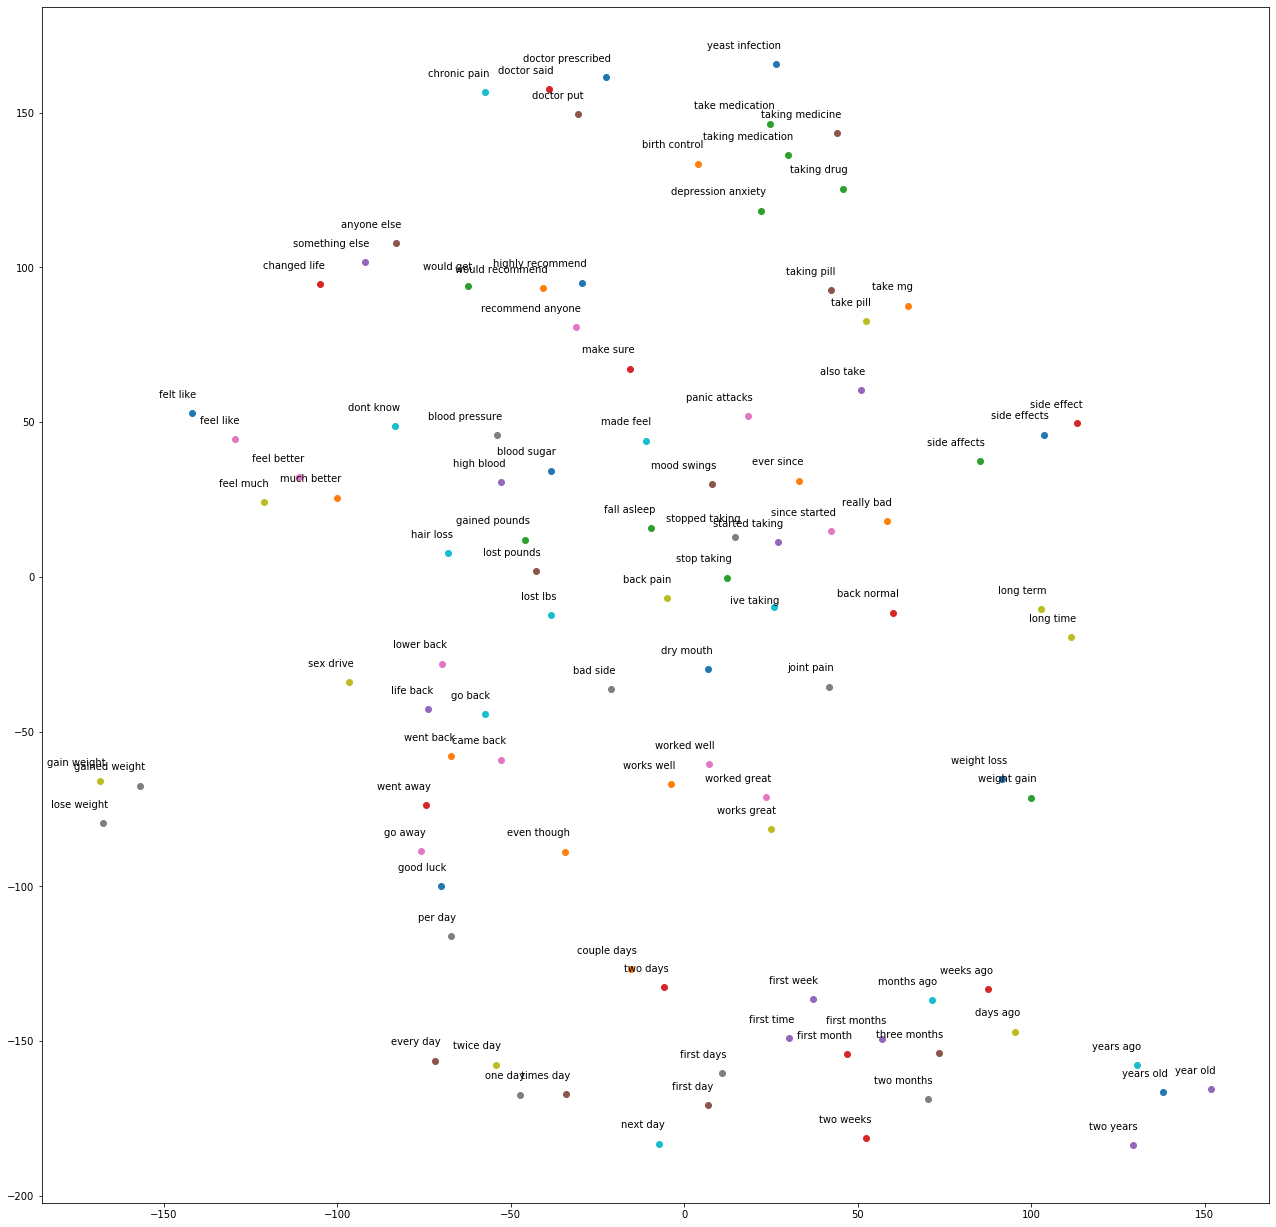

In [13]:
plot_with_labels(low_dim_embedding, top_words)